In [ ]:
# Todo - change to Python 3 and remove this.
from __future__ import division, print_function

# Project 1 - Working with Existing Code and Debugging
Writing code is important. But a big part of being on a self driving car team is working with a **large** existing codebase. On high stakes engineering projects like a self driving car, you will probably have to earn the trust of your managers and coworkers before they'll let you make substantial changes to the code base. 

A typical assignment for someone new to a team is to make progress on a backlog of bugs. So with that in mind, that's what you will be doing for your first project in the Nanodegree.

This repository contains code for a localization module for robots that live in discrete 2D worlds. Unfortunately one of the tests in `localization_tests.py` isn't passing. Your job in this project is to identify the cause of the bug and fix it without introducing any new bugs.

Your submission will be considered "passing" if the changes you make cause all of the tests in `localization_tests.py` to pass. You'll go through this project in a few parts:

1. **Explore the Code** - don't worry about bugs at this point. The goal is to get a feel for how this code base is organized and what everything does.
2. **Implement a Feature** - write code that gets the robot moving correctly.
3. **Identify and Reproduce a Bug** - Implementing motion will reveal a bug which hadn't shown up before. Here you'll identify what the bug is and take steps to reproduce and understand it. 
4. **Write a Test** - here you'll write a test (which currently fails) which will help avoid reintroducing it in the future.
5. **Fix** - here you'll actually fix the bug using a systematic process.


## Part 1: Exploring the code
In this section you will just run some existing code to get a feel for what this localizer does.

You can navigate through this notebook using the arrow keys on your keyboard. 

When you get to a cell with code in it you can run that code in one of two ways:

1. **Shift + Enter**: this runs the code in the cell and then moves you into the next cell. This is good for stepping through the notebook incrementally.

2. **Ctrl + Enter (Windows) / Cmd + Enter (Mac)**: this runs the code in the cell without moving your cursor's focus. Good for running the same code many times.

Navigate through the cells below. In each cell you should

1. Read through the code. It's okay to not understand everything at this point. 
2. Guess what will happen when you run the code. 
3. Run the code and compare what you see with what you expected. 
4. When you get to a **TODO** read the instructions carefully and complete the activity.



In [171]:
# This code "imports" code from some of the other files we've written
# in this directory. Specifically simulate.py and helpers.py
from simulate import Simulation
import simulate as sim
import helpers
reload(sim)
reload(helpers)

<module 'helpers' from 'helpers.pyc'>

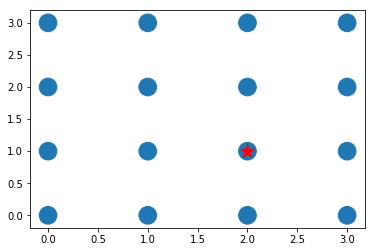

In [172]:
# This code defines a 4x4 robot world as well as some other parameters
# which we will discuss later. It then creates a simulation and shows 
# the initial beliefs. 
R = 'r'
G = 'g'
grid = [
    [R,G,G,G],
    [G,G,R,G],
    [G,R,G,G],
    [R,R,G,R],
]
blur = 0.05
p_hit = 4.0
simulation = sim.Simulation(grid, blur, p_hit)
simulation.show_beliefs()

_____
### Activity 1.1
Run the code below multiple times by repeatedly pressing Ctrl + Enter (or Cmd + Enter).

After each run observe how the state has changed. 

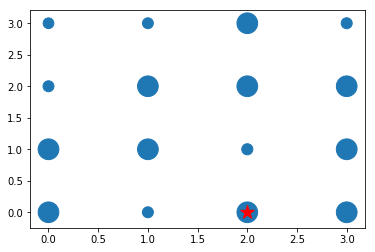

In [173]:
simulation.run(1)
simulation.show_beliefs()

What do you think this call to `run` is doing? 

**TODO**
Look at the code in `simulate.py`. It calls two other methods from the Simulate class. What are the names of those methods and, in one sentence for each, describe what each of those methods does. Enter your answer below.

____
#### `run` explained

The run method advances the state of the robot by some number of timesteps. At each timestep the method makes a call to the `sense` method to update the robot's beliefs and then generates a random motion using the `random_move` method and then finally calls the `move` methods to move the robot.

Note: the show_probabilities method displays a visual representation of the robot's beliefs: bigger circles mean higher probabilities. The red star represents the robot's true position.

You could look at the actual probabilities with the code below

In [174]:
for row in simulation.beliefs:
    print(row)

[0.02309782608695652, 0.023641304347826086, 0.0855978260869565, 0.02418478260869565]
[0.02391304347826087, 0.08532608695652172, 0.0858695652173913, 0.08532608695652172]
[0.08614130434782608, 0.08559782608695651, 0.024728260869565217, 0.08614130434782608]
[0.08532608695652173, 0.02391304347826087, 0.08532608695652173, 0.0858695652173913]


In [175]:
# but that doesn't look very nice. The code below will round all the numbers
# to three decimal places

In [176]:
for row in uniform_beliefs:
    for belief in row:
        print("{:0.3f}".format(belief))

0.250
0.250
0.250
0.250


In [177]:
# whoops, that prints each probability on a new line. Two small additions
# will fix that.
for row in uniform_beliefs:
    for belief in row:
        print("{:0.3f}".format(belief), end="  ")
    print()

0.250  0.250  
0.250  0.250  


In [178]:
# Much better. We'll probably want to look at probabilities a lot, so lets 
# make that into its own function. Repeating yourself is bad.

def show_rounded_beliefs(beliefs):
    for row in beliefs:
        for belief in row:
            print("{:0.3f}".format(belief), end="  ")
        print()

In [179]:
# let's just make sure that works by passing uniform_beliefs
# into it and confirming it does what we think.
show_rounded_beliefs(uniform_beliefs)

0.250  0.250  
0.250  0.250  


_____

_____

### Part 1.2: Using someone else's code / Comfort with abstractions.
Later you will be asked to play around with different parameters to observe their effect on the robot's localization. You've been given some functions in `helpers.py` and `simulate.py` which will help you analyze the performance of the localizer. 

The goal for this section is to get some experience using existing code **without** understanding how it works. This is something we do all the time when we program and it takes practice to do it well.

**Try to avoid looking at the actual code in helpers.py or simulate.py**

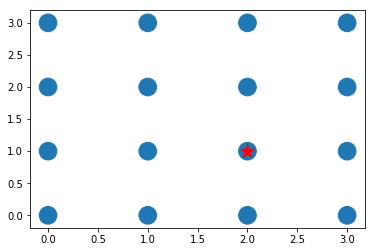

In [180]:
# you've already seen what show_beliefs does, but let's 
# run that code one more time.

R = 'r'
G = 'g'
grid = [
    [R,G,G,G],
    [G,G,R,G],
    [G,R,G,G],
    [R,R,G,R],
]
blur = 0.05
p_hit = 4.0
simulation = sim.Simulation(grid, blur, p_hit)
simulation.show_beliefs()

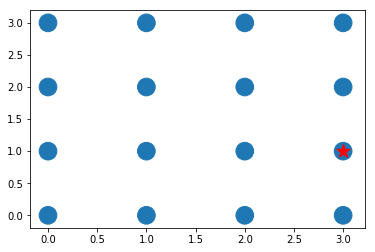

In [181]:
# what do you think you'll see if you run the following?
# Give this some thought before you run this cell.
# Specifically, come up with answers to these questions:
# 1. How will the size of the circles (beliefs) change if they change at all?
# 2. Where will the red star be?

simulation.move(0,1)
simulation.show_beliefs()

In [182]:
# The robot moved one to the right. Go back up to the cell you just ran
# and run it again. What do you think will happen if the robot tries
# to move right when it is already at the "edge" of its world?

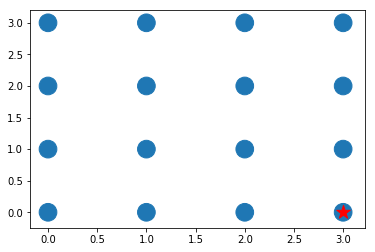

In [183]:
# This world is cyclical. It wraps around on itself.
# What will happen if you run the following?
simulation.move(1,0)
simulation.show_beliefs()

In [184]:
# In this coordinate system the y axis points downwards.
# This is a common convention when representing a grid as 
# a list of lists.

We can explore how code works by using functions and observing what the output looks like. While this is often a useful strategy, it's not the only strategy. 

In [185]:
normalized_beliefs = [
    [0.25, 0.25],
    [0.25, 0.25]
]
show_rounded_beliefs(normalized_beliefs)

0.250  0.250  
0.250  0.250  


In [186]:
non_normalized_beliefs = [
    [1.0, 1.0],
    [1.0, 1.0]
]
show_rounded_beliefs(non_normalized_beliefs)

1.000  1.000  
1.000  1.000  


In [187]:
normalized = helpers.normalize(non_normalized_beliefs)
show_rounded_beliefs(normalized)

0.250  0.250  
0.250  0.250  


Great! The `normalize` function behaves as expected. Let's explore the is_robot_localized function.

In [188]:
beliefs = [
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
]

In [ ]:
true_pos = (2,2)
helpers.is_robot_localized(beliefs, true_pos)

In [ ]:
true_pos = (1,2)
helpers.is_robot_localized(beliefs, true_pos)

In [ ]:
# The function is_robot_localized is a little weird. It returns
# a TUPLE with two elements (not three). What are those elements? 
# How can you find out? You COULD consult the actual code. Or you could
# look at the documentation written for that function by writing 
# something like this:
helpers.is_robot_localized?

In [ ]:
# according to the documentation, this function returns 2 things:
# first - a boolean indicating whether or not it's localized and 
# then a (y,x) tuple which gives the coordinates of the robots best 
# guess. Python supports "tuple unpacking" as demonstrated below:

true_pos = (1,2) # true position is y=1, x=2
localized, best_guess = helpers.is_robot_localized(localized_beliefs, true_pos)

print("Localized? ", localized)
print("Best guess:", best_guess)
print("True pose: ", true_pos)

We'll come back to localizing our robot in a bit. For now let's explore the blur function.

In [ ]:
certain_beliefs = [
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
]
blurring_factor = 0.25
blurred = helpers.blur(certain_beliefs, blurring_factor)
show_rounded_beliefs(blurred)

In [ ]:
beliefs = certain_beliefs

In [ ]:
# Run the following code until the robot is no longer considered localized. Note
# what's happened to the probabilities at this point.
# Remember: use Ctrl + Enter or Cmd + Enter to run code WITHOUT
# advancing to the next cell.
true_pos = (2,2)
beliefs = helpers.blur(beliefs, blurring_factor)
localized, guess = helpers.is_robot_localized(beliefs, true_pos)
print("Localized?", localized)
show_rounded_beliefs(beliefs)

In [ ]:
# What do you think will happen if you keep blurring the beliefs?
# Try running the above block of code ANOTHER 20 times. You should
# see the distribution approaching a uniform probability distribution.